In [42]:
import cv2
import numpy as np
from PIL import Image

In [440]:
%%timeit
img1 = np.array(Image.open("../data/train_960x640/3cb21125f126_04.png"))
img2 = np.array(Image.open("../data/train_960x640/3cb21125f126_08.png"))
mask1 = np.array(Image.open("../data/train_masks_960x640/3cb21125f126_04_mask.png"))
mask2 = np.array(Image.open("../data/train_masks_960x640/3cb21125f126_08_mask.png"))

61 ms ± 2.62 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [182]:
batchx = np.zeros((2, ) + img1.shape, dtype=np.uint8)
batchy = np.zeros((2, ) + mask1.shape + (1, ), dtype=np.uint8)

In [183]:
batchx[0, ...] = img1
batchx[1, ...] = img2
batchy[0, :, :, 0] = mask1
batchy[1, :, :, 0] = mask2

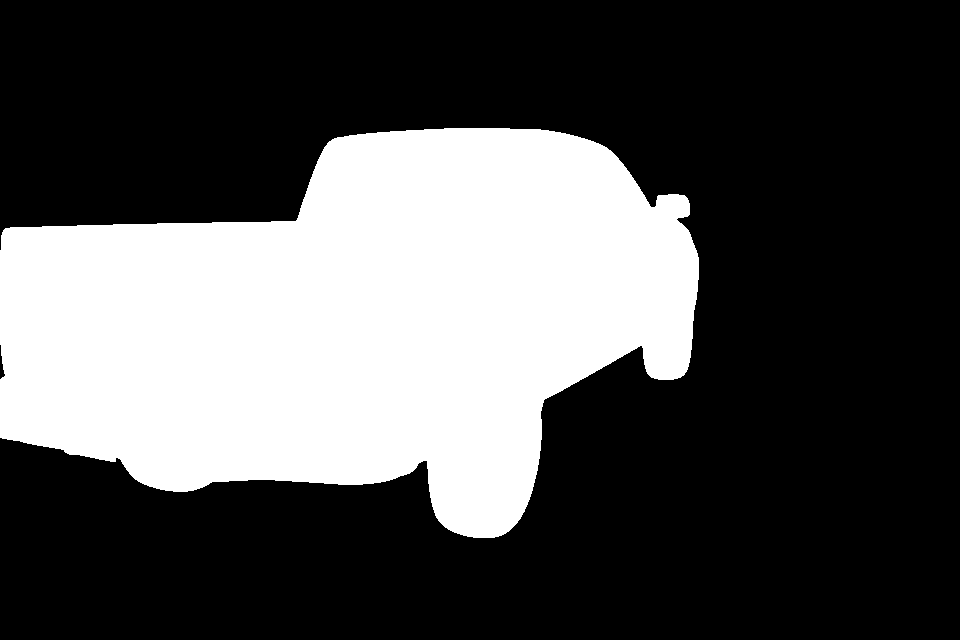

In [184]:
# mirror along vertical axis
Image.fromarray(np.flip(batchy, 2)[1, :, :, 0] * 255)

In [456]:
import cv2
import numpy as np


def flip(x, y, apply_chance=0.5):
    if np.random.rand(1) < apply_chance:
        x[...] = np.flip(x, 1)
        y[...] = np.flip(y, 1)


def hue_change(x, y, r=(-180, 180)):
    hue_diff = np.random.randint(r[0], r[1])
    x[..., 0] = np.maximum(0, np.minimum(179, x[..., 0].astype(np.int32) - hue_diff))


def sat_change(x, y, r=(0, 255)):
    sat_diff = np.random.randint(r[0], r[1])
    x[..., 1] = np.maximum(0, np.minimum(255, x[..., 1].astype(np.int32) - sat_diff))


def val_change(x, y, r=(-30, 30)):
    val_diff = np.random.randint(r[0], r[1])
    x[..., 2] = np.maximum(0, np.minimum(255, x[..., 2].astype(np.int32) - val_diff))


def zoom(x, y, apply_chance=0.3, zmax=1.2, zdiffmax=0.1):
    apply_zoom = np.random.rand(1)
    if apply_zoom > apply_chance:
        return
    
    h, w, c = x.shape
    zy = 1 + np.random.rand(1) * (zmax - 1)
    zx = 1 + np.random.rand(1) * (zmax - 1)
    if zy > zx:
        zy = min(zy, zx + zdiffmax)
    else:
        zx = min(zx, zy + zdiffmax)

    hz = int(np.round(h/zy))
    wz = int(np.round(w/zx))
    dh = (h - hz) // 2
    dw = (w - wz) // 2
    xz = x[dh: dh + hz, dw: dw + wz, ...]
    yz = y[dh: dh + hz, dw: dw + wz, ...]
    x[...] = cv2.resize(xz, (w, h), interpolation=cv2.INTER_CUBIC)
    maskz = cv2.resize(yz * 255, (w, h), interpolation=cv2.INTER_CUBIC)
    y[...] = (maskz > 127).astype(np.uint8)


def random_transformation(x, y):
    y_cpy = y.copy()
    x_hsv = cv2.cvtColor(x, cv2.COLOR_RGB2HSV)

    hue_change(x_hsv, y_cpy)
    sat_change(x_hsv, y_cpy)
    val_change(x_hsv, y_cpy)
    flip(x_hsv, y_cpy)
    x_rgb = cv2.cvtColor(x_hsv, cv2.COLOR_HSV2RGB)
    zoom(x_rgb, y_cpy)

    return x_rgb, y_cpy


In [457]:
%%timeit
img1c, mask1c = random_transformation(img1, mask1)

56.5 ms ± 8.3 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [468]:
img1c, mask1c = random_transformation(img1, mask1)

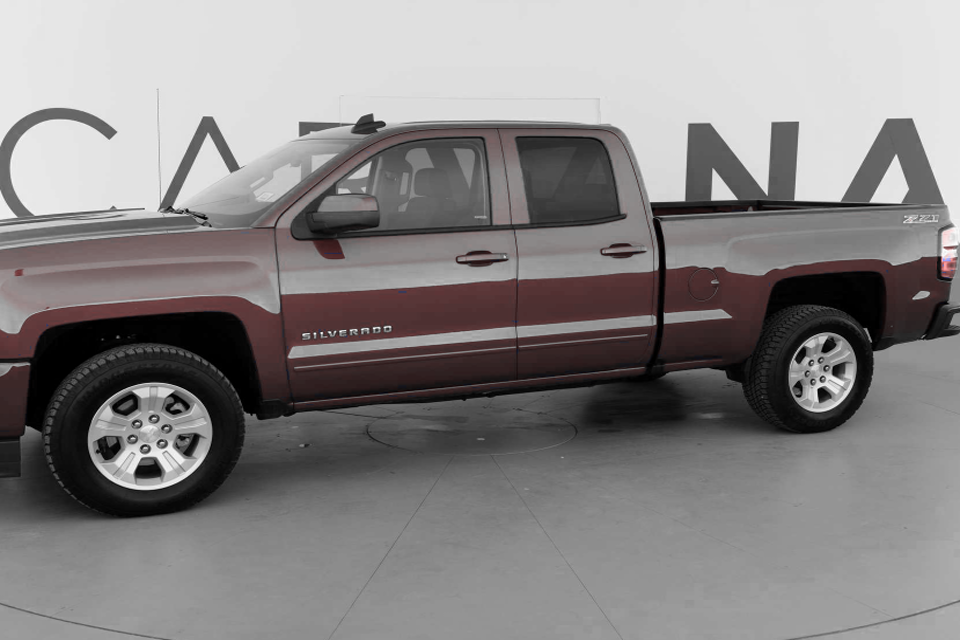

In [469]:
Image.fromarray(img1c)

In [435]:

sat_change(im_hsv1, im_hsv1)

In [346]:
np.max(im_hsv1)

255

In [347]:
im_hsv1.dtype

dtype('uint8')

In [62]:
im_hsv[..., 0] += 10

In [63]:
im_bgr = cv2.cvtColor(im_hsv, cv2.COLOR_HSV2BGR)

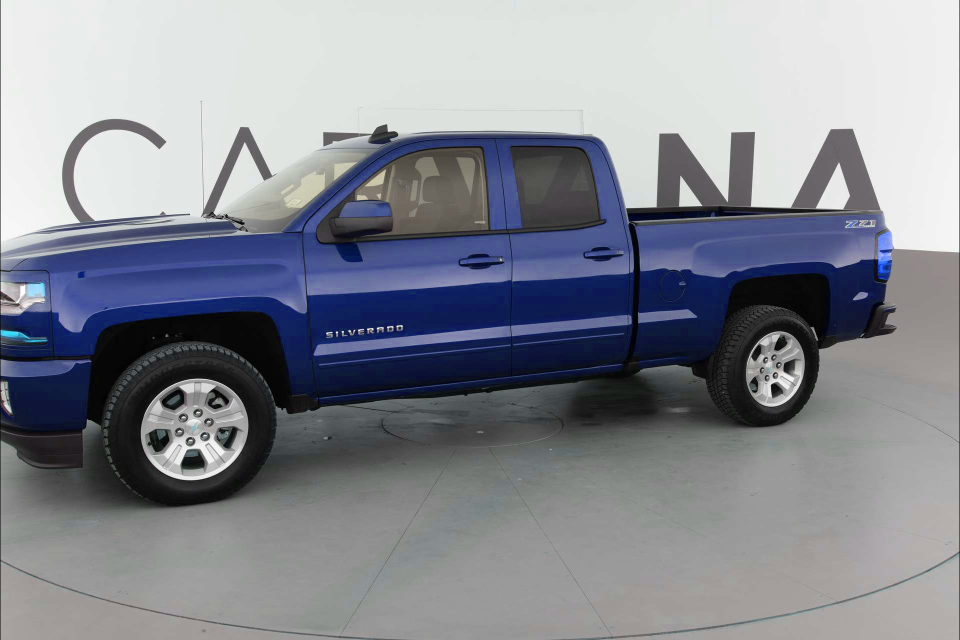

In [64]:
Image.fromarray(im_bgr)

In [68]:
%%timeit 
im_hsv[..., 1] = np.where(im_hsv[..., 1] >= 100,  im_hsv[..., 1]-100, 0)

2.22 ms ± 331 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [69]:
%%timeit
im_bgr = cv2.cvtColor(im_hsv, cv2.COLOR_HSV2BGR)

15.6 ms ± 952 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


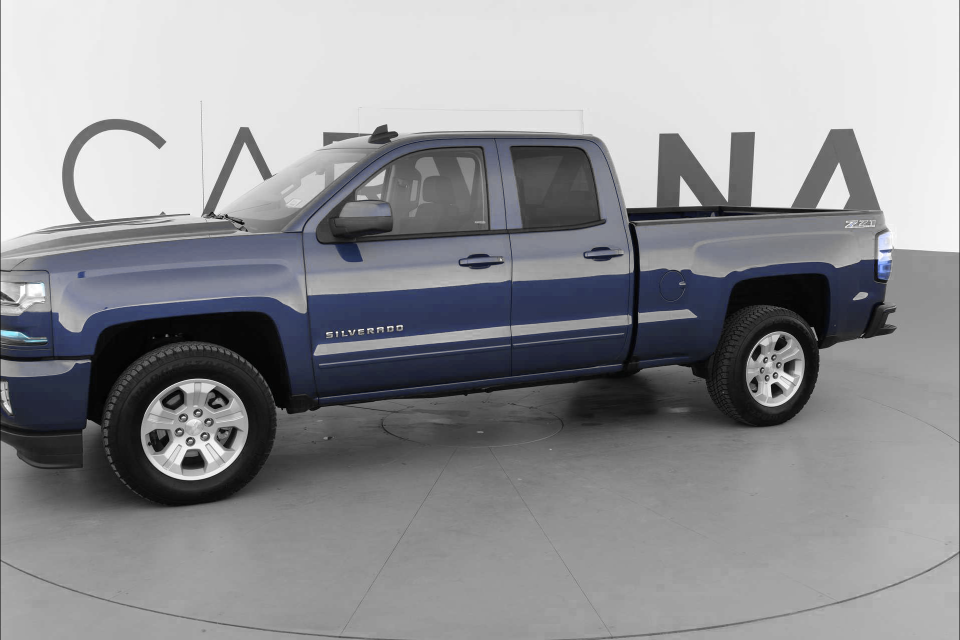

In [70]:
Image.fromarray(im_bgr)